## Polynomial linear regression
<br>
$$y = b_{0} + b_{1}*x_{1}+ b_{2}*x^2_{1} + b_{3}*x^3_{1} + ... + b_{n}*x^n_{1}$$

- the same variable $x_{1}$ with different powers


<br>
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png">

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
dataset = pd.read_csv('Position_Salaries.csv')

In [57]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [81]:
X = dataset.iloc[:, 1:2].values #independent variables
y = dataset.iloc[:, 2].values #dependent variable

In [59]:
# Fitting Linear Regression to the dataset

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [72]:
# Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # 2 - power, default degree of polynomial features
X_poly = poly_reg.fit_transform(X)

In [73]:
pd.DataFrame(X_poly).head() # 0 - constant, intercept added automatically, 1 - original column, 2 = power of 2

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0


In [74]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

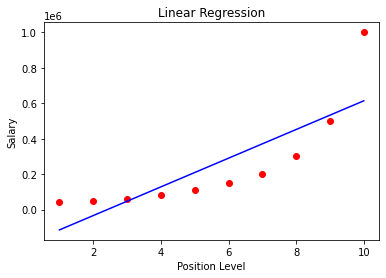

In [75]:
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg.predict(X), color="blue")
plt.title("Linear Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

Text(0, 0.5, 'Salary')

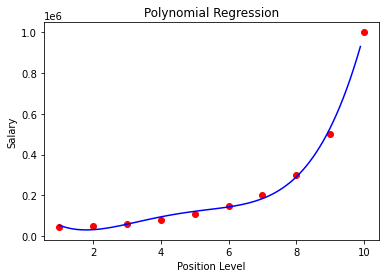

In [76]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid)), 1)
plt.scatter(X, y, color="red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color="blue")
plt.title("Polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")

In [52]:
# Predicting a new result with Linear Regression

lin_reg.predict(np.array([6.5]).reshape(1, 1))

array([330378.78787879])

In [54]:
# Predicting a new result with Polynomial Regression

lin_reg_2.predict(poly_reg.fit_transform(np.array([6.5]).reshape(1, 1)))

array([158862.45265153])